In [1]:
!pip install numpy pandas matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd

# Simulate simple network data (traffic, signal, bandwidth, latency)
np.random.seed(0)
data = pd.DataFrame({
    'traffic_load': np.random.randint(50, 500, 100),  # number of users
    'signal_strength': np.random.randint(40, 100, 100),  # in dB
    'bandwidth_usage': np.random.randint(10, 100, 100),  # in Mbps
    'latency': np.random.randint(10, 100, 100)  # in ms
})

# Display the first few rows of the data
data.head()


,traffic_load,signal_strength,bandwidth_usage,latency
0,222,52,62,63
1,97,76,77,90
2,167,92,71,72
3,242,80,24,18
4,373,54,14,71


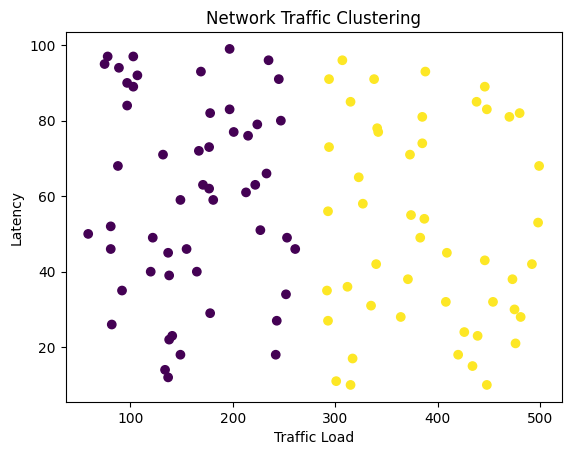

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans to detect bottlenecks
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['traffic_load', 'signal_strength', 'bandwidth_usage', 'latency']])

# Plot results (you can visualize the bottlenecks)
plt.scatter(data['traffic_load'], data['latency'], c=kmeans.labels_)
plt.title('Network Traffic Clustering')
plt.xlabel('Traffic Load')
plt.ylabel('Latency')
plt.show()


In [4]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  # Assume 10% anomalies
iso_forest.fit(data[['traffic_load', 'signal_strength', 'bandwidth_usage', 'latency']])

# Detect anomalies
anomalies = iso_forest.predict(data[['traffic_load', 'signal_strength', 'bandwidth_usage', 'latency']])
data['anomaly'] = anomalies

# Display rows with detected anomalies
data[data['anomaly'] == -1]


,traffic_load,signal_strength,bandwidth_usage,latency,anomaly
8,59,98,87,50,-1
19,89,40,93,94,-1
25,75,90,23,95,-1
37,149,49,11,59,-1
42,197,98,92,99,-1
46,499,97,96,68,-1
50,82,99,53,26,-1
58,78,67,12,97,-1
61,178,98,99,82,-1
62,470,41,33,81,-1


In [5]:
# Simulate adjustments for detected anomalies
adjusted_data = data.copy()

# If anomaly detected, adjust traffic load and signal strength (for simplicity)
adjusted_data.loc[adjusted_data['anomaly'] == -1, 'traffic_load'] *= 0.8  # Reduce traffic load by 20%
adjusted_data.loc[adjusted_data['anomaly'] == -1, 'signal_strength'] += 10  # Increase signal strength by 10 dB

# Display adjusted data
adjusted_data.head()


<ipython-input-5-ada84f3fa763>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 47.2  71.2  60.  119.2 157.6 399.2  65.6  62.4 142.4 376. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adjusted_data.loc[adjusted_data['anomaly'] == -1, 'traffic_load'] *= 0.8  # Reduce traffic load by 20%


,traffic_load,signal_strength,bandwidth_usage,latency,anomaly
0,222.0,52,62,63,1
1,97.0,76,77,90,1
2,167.0,92,71,72,1
3,242.0,80,24,18,1
4,373.0,54,14,71,1


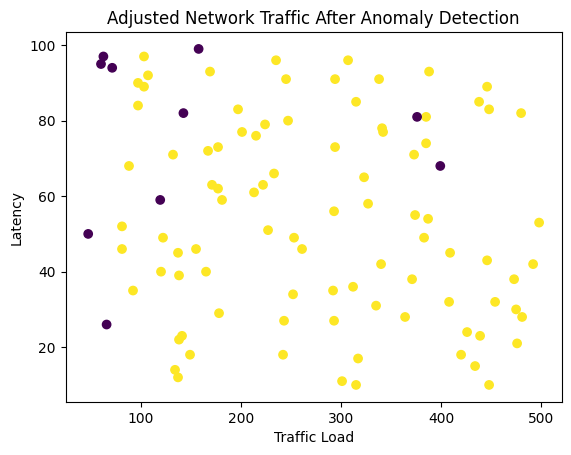

In [6]:
# Plot the adjusted data
plt.scatter(adjusted_data['traffic_load'], adjusted_data['latency'], c=adjusted_data['anomaly'])
plt.title('Adjusted Network Traffic After Anomaly Detection')
plt.xlabel('Traffic Load')
plt.ylabel('Latency')
plt.show()


In [7]:
adjusted_data.to_csv('adjusted_network_data.csv', index=False)

In [8]:
from google.colab import files
files.download('adjusted_network_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>